<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```



\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize


In [4]:
theta = lambda x: x- np.sin(x) - np.pi/2

## Construya una grafica para theta, Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

In [5]:
x= np.arange(0,2*np.pi,0.01)#valores de theta
y= theta(x) #valores evaluados en la funcion

In [6]:
d={'theta': x, 'Funcion':y}#serie
df=pd.DataFrame(d)#Dataframe

<function matplotlib.pyplot.show(close=None, block=None)>

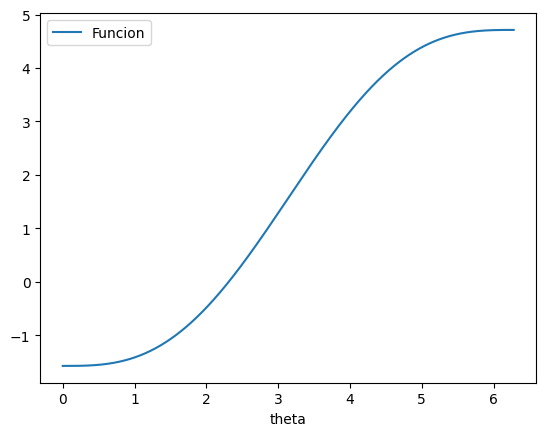

In [7]:
df.plot.line(x='theta',y='Funcion')
plt.grid
plt.show

<Axes: xlabel='theta'>

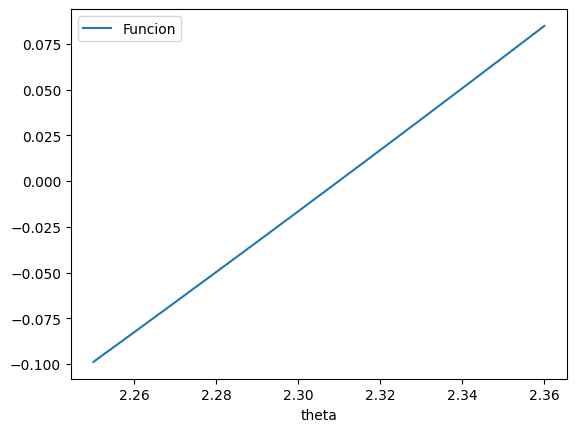

In [8]:
df_filtro=df[df.Funcion.between(-0.1,0.1)]
df_filtro.plot.line(x='theta', y='Funcion')

In [9]:
df_filtro

,theta,Funcion
225,2.25,-0.098870
226,2.26,-0.082549
227,2.27,-0.066151
228,2.28,-0.049677
229,2.29,-0.033127
230,2.30,-0.016502
231,2.31,0.000198
232,2.32,0.016972
233,2.33,0.033819
234,2.34,0.050739


## Emplee el metodo de biseccion, punto fijo, newton y secante para comprobar la solución intuida del apartado anterior.

In [10]:
#Metodo de biseccion
optimize.bisect?

In [11]:
raiz= optimize.bisect(theta, 2.30,2.31)
print('La raiz usando el metodo de biseccion sera:',raiz)

La raiz usando el metodo de biseccion sera: 2.3098814600089104


In [12]:
#Metodo de Newton_Rhapson
optimize.newton?

In [13]:
theta = lambda x: x- np.sin(x) - np.pi/2
dtheta=lambda x:1 - np.cos(x)

In [14]:
raiz_newton = optimize.newton(theta,2.30,dtheta)
print('La raiz usando el metodo de Newton-Rhapson sera:', raiz_newton)

La raiz usando el metodo de Newton-Rhapson sera: 2.309881460010057


In [15]:
#Metodo de punto fijo
optimize.fixed_point?

In [16]:
fixed_theta =lambda x: x - theta(x)
raiz_fijo= optimize.fixed_point(fixed_theta,2.30)

In [17]:
print('La raiz usando el metodo de punto fijo sera:', raiz_fijo)

La raiz usando el metodo de punto fijo sera: 2.3098814600100575


In [18]:
#Metodo de la secante
raiz_secante= optimize.newton(theta, 2.30)
print('La raiz usando el metodo de secante sera:', raiz_secante)

La raiz usando el metodo de secante sera: 2.3098814600100575


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.


In [19]:
s0=300
m=0.25
k=0.1
g=32.17
S = lambda t: 300 - ((0.25*32.17/0.1)*t) + ((0.25)**2)*(32.17/0.1)*t*(1- (np.exp(-0.1*t/0.25)))

In [20]:
t= np.arange(-10,10, 0.01)#valores de t
y= S(t) #valores evaluados en la funcion

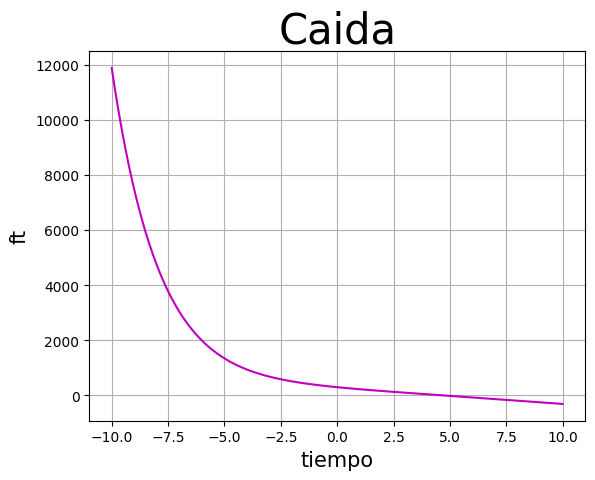

In [21]:
plt.figure()
plt.plot(t,y,'m')
plt.title('Caida',fontsize=30)
plt.xlabel('tiempo',fontsize=15)
plt.ylabel('ft',fontsize=15)
plt.grid()

<function matplotlib.pyplot.show(close=None, block=None)>

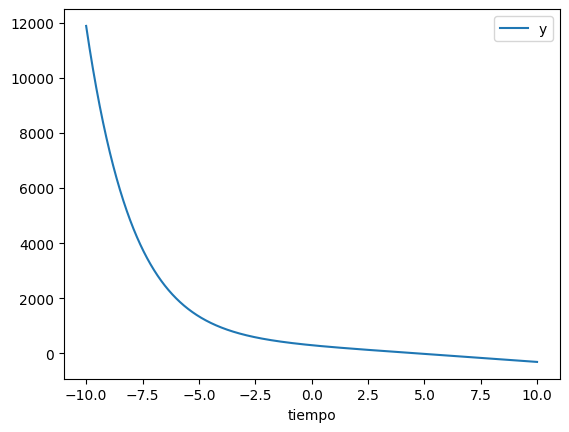

In [22]:
dt={'tiempo': t, 'y':y}#serie
df=pd.DataFrame(dt)#Dataframe
df.plot.line(x='tiempo',y='y')
plt.grid
plt.show

In [23]:
#metodo de biseccion
raizs= optimize.bisect(S, 4,5)
print('La raiz usando el metodo de biseccion sera:',raizs)

La raiz usando el metodo de biseccion sera: 4.736139137605278


In [24]:
#punto fijo
fixed_S =lambda x: x - S(x)
raizs_fijo= optimize.fixed_point(fixed_S, 4.5)
print('La raiz usando el metodo de punto fijo sera:',raizs_fijo)


La raiz usando el metodo de punto fijo sera: 4.73613913760349


In [25]:
# Newton
s0=300
m=0.25
k=0.1
g=32.17
S = lambda t: 300 - ((0.25*32.17/0.1)*t) + ((0.25)**2)*(32.17/0.1)*t*(1- (np.exp(-0.1*t/0.25)))
ds= lambda t: -(0.25*32.17/0.1)+(((0.25)**2)*((32.17/0.1))*np.exp((-0.1*t)/(m)))

In [26]:
raizs_newton = optimize.newton(S,4.5,ds)
print('La raiz usando el metodo de Newton-Rhapson sera:', raizs_newton)

La raiz usando el metodo de Newton-Rhapson sera: 4.736139132976353


In [27]:
# Secante
raizs_secante= optimize.newton(S, 4.5)
print('La raiz usando el metodo de secante sera:', raizs_secante)

La raiz usando el metodo de secante sera: 4.73613913760349



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


In [28]:
T=0.5
M=lambda m: m-np.tanh(m/T)

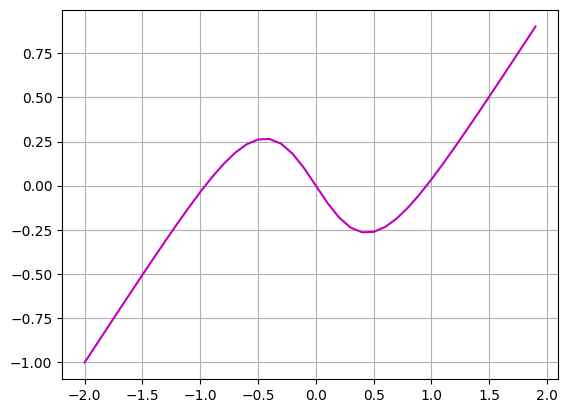

In [29]:
m=np.arange(-2,2,0.1)
y1=M(m)
plt.figure()
plt.plot(m,y1,'m')
plt.grid()

In [30]:
# a)
raizm_secante= optimize.newton(M, -1)
print(round(raizm_secante,4))


-0.9575


In [31]:
raizm_secante= optimize.newton(M, 1)
print(round(raizm_secante,4))

0.9575


In [32]:
#b)
fixed_M =lambda m: m - M(m)
raizm_fijo= optimize.fixed_point(fixed_M, -1)
print(raizm_fijo)

-0.9575040240772689


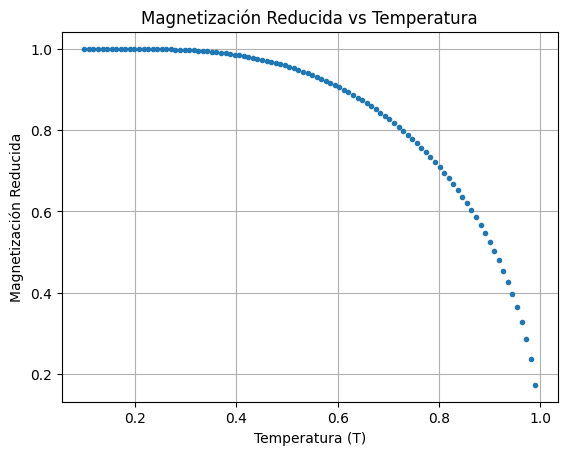

In [33]:
#d
T = np.linspace(0.1, 0.99, 100)
def Ma(m, T):
    return m - np.tanh(m/T)
ma_r=[]
for t in T:
  Mr=lambda m: optimize.newton(Ma, 1, args=(t,))
  ma_r.append(Mr(1))

# Graficar
plt.plot(T, ma_r, '.')
plt.title('Magnetización Reducida vs Temperatura')
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetización Reducida')
plt.grid()
plt.show()


5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.



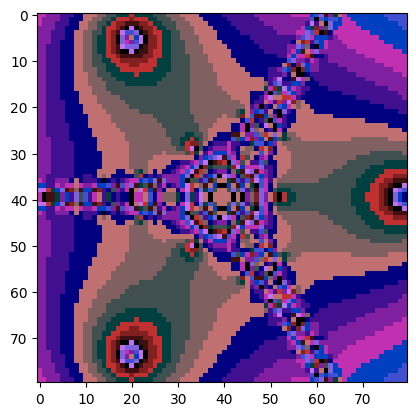

In [34]:
#Primero se importan las librerias
import numpy as np #para los calculos
import matplotlib.pylab as plt #para graficar
from PIL import Image #para manejar imagenes

#se definen el numero de pixellels para determinar las dimensiones de la imagen
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

#crea la imagen
image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial


npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion
def f(z):
  return z**3 - 1
#derivada de f(z)
def fp(z):
  return 3*z**2
#funcion que calcula la derivada con respecto a z
h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h

#parametros para iterar
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      #Metodo iterativo para calcular las raices (Newton)
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
